In [4]:
import pandas as pd

In [5]:
anno_sizes_path = "/cluster/work/grlab/projects/metagenome/data/BIGSI/subsets/sshash/brwt_annotation_sizes.txt"
graph_sizes_path = "/cluster/work/grlab/projects/metagenome/data/BIGSI/subsets/sshash/graph_sizes.txt"

In [6]:
df_anno = pd.read_csv(anno_sizes_path, sep=', ')
df_graph = pd.read_csv(graph_sizes_path, sep=', ')

/scratch/slurm-job.4695059/ipykernel_663185/4000796926.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_anno = pd.read_csv(anno_sizes_path, sep=', ')
/scratch/slurm-job.4695059/ipykernel_663185/4000796926.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_graph = pd.read_csv(graph_sizes_path, sep=', ')


In [7]:
anno_max = df_anno.max().max()
graph_max = df_graph.max().max()
y_max = max([anno_max, graph_max])

In [8]:
color_dict = {"SSHash kmers":'tab:blue',"SSHash pure superkmers":'red',
              "SSHash superkmers":'tab:green',"superkmer bit vector":'darkgreen',
              "succinct":'tab:orange',
              "SSHash":'tab:blue',"succinct":'tab:orange'}

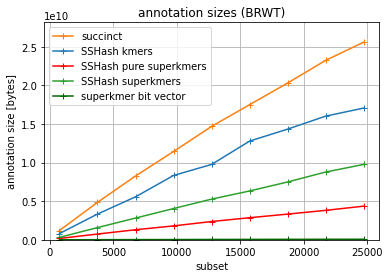

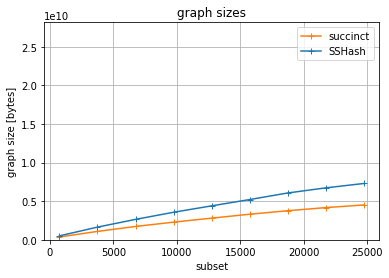

In [9]:
cols = df_anno.columns[1:]
anno_fig = df_anno.plot(x=df_anno.columns[0],y=cols,ylim=(0, 1.1*y_max),
                        xlabel="subset",ylabel="annotation size [bytes]",title="annotation sizes (BRWT)",
                        color=[color_dict.get(x, '#333333') for x in cols], grid=True, marker='+').get_figure()
graph_fig = df_graph.plot(x=df_graph.columns[0],y=[df_graph.columns[1],df_graph.columns[2]],
                          ylim=(0, 1.1*y_max),xlabel="subset",ylabel="graph size [bytes]",
                          title="graph sizes",
                          color=[color_dict.get(x, '#333333') for x in df_graph.columns[1:]], grid=True, marker='+').get_figure()

In [21]:
anno_fig.savefig("brwt_anno_size_plot.eps",format='eps')
graph_fig.savefig("brwt_graph_size_plot.eps",format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
